# Turing Machine and Deep Learning

## Assignment 2: Supervised Classification Problems

This notebook is meant for you to review and reflect on the content of Lecture 2, which was mainly about supervised learning problems in the general context of classification. We will reflect mainly on model and hyperparameter selection over the models we have discussed during the lecture: logistic regression, decision trees, random forests and support vector machines. This notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


# Question 1 -- Classification Metrics

To contextualise, we learnt of 4 metrics in class: accuracy, precision, recall and F1 score. Answer the following text questions in the following markdown cell.
1. For accuracy, precision and recall, mention one specific example *each* (i.e. a well-defined problem where ML can be used) where they would be preferable.
2. For accuracy, precision and recall, mention one specific example *each* (i.e. a well-defined problem where ML can be used) where they would fail.
3. In which situations would the F1 score be helpful? Give one concrete example.

1. 
Accuracy: A balanced image classification task (each class ~50% of the data). 
In a balanced scenario where misclassification costs are roughly equal, maximizing the overall fraction of correct predictions (accuracy) is straightforward and meaningful.

Precision: Spam detection system where sending an innocent (non-spam) email to the spam folder is highly undesirable.
We want to minimize false positives (i.e., marking a legitimate email as spam). High precision ensures that whenever you flag an email as spam, it is very likely to be spam.

Recall: Disease screening for a life-threatening but treatable condition (e.g., cancer).
We want to minimize false negatives (i.e., missing an actual case). High recall ensures that almost everyone who has the disease gets flagged for further testing or treatment.

2. 
Accuracy: Fraud detection in credit card transactions where fraud is only 1% of transactions.
Accuracy can be misleading in highly imbalanced datasets. A model that predicts “not fraud” for all transactions gets 99% accuracy yet is worthless at catching fraud.

Precision: Emergency rescue triage where the goal is to identify all critical patients.
If we only optimize for high precision, we might miss many critical patients (false negatives). This could be fatal, so ignoring recall is dangerous.

Recall: Spam detection in an office environment where mistakenly marking important internal emails as spam has a big negative impact.
If we only optimize for high recall (catching all spam), we might label too many legitimate emails as spam (false positives), disrupting communication.

3.
F1 Score is the harmonic mean of precision and recall. It is especially helpful when you want a balance between precision and recall and have a moderately imbalanced dataset, or when both false positives and false negatives are important.

Example: A medical test for a contagious but not necessarily fatal disease. We want to ensure we catch most infected individuals (high recall) but also avoid labeling too many healthy people as infected (high precision). The F1 score provides a single metric that balances these concerns. A purely high precision might miss infected individuals; a purely high recall might label many healthy individuals as sick. F1 helps optimize both simultaneously.


## Question 2 -- CIFAR 10

As we've discussed last week, one of the prime issues with ML is figuring out what model you are going to use and when. In this case, we're going to use the [CIFAR-10](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10) dataset from TensorFlow, another benchmarking dataset. This is a considerably larger dataset, and contains coloured images. For the sake of computation time, we are just going to use the first 1000 training images but the full test set (though in a proper ML setting we would prefer to use all training data). The images are 32x32 coloured pixes. There are 10 labels which are integers by default. The dictionary `class_labels` translate them to their text label equivalents (referenced from [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)).

In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/20/cf/55b68d5896e58e25f41e5bc826c96678073b512be8ca2b1f4b101e0f195c/tensorflow-2.19.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751cd1a0c3a6ae84346796a5758123f3ed97a1b121dfbf4f3/gast-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-pasta>=0.1.1 from https://files.pythonhosted.org/packages/a3/de/c648e

In [2]:
pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/d0/30/dc54f88dd4a2b5dc8a0279bdd7270e735851848b762aeb1c1184ed1f6b14/tqdm-4.67.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


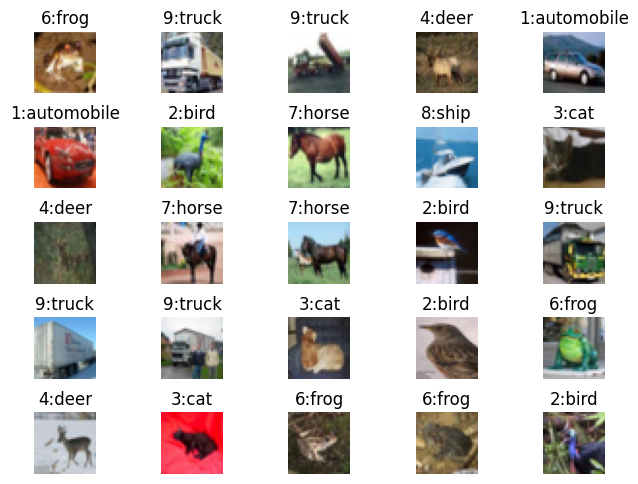

In [1]:
# don't need to edit anything here,
# just run this cell

# get dataset
from tensorflow.keras.datasets import cifar10
# get common libraries
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # this is a new one: makes loading bars

def get_data_subset(n_train, n_test):
    (train_X, train_y), (test_X, test_y) = cifar10.load_data()
    train_X, train_y, test_X, test_y = train_X[:n_train], train_y[:n_train], test_X[:n_test], test_y[:n_test]
    train_y, test_y = train_y.squeeze(), test_y.squeeze()
    return train_X, train_y, test_X, test_y

n_train, n_test = 1000, 1000

train_X, train_y, test_X, test_y = get_data_subset(n_train, n_test)

fig, axs = plt.subplots(5,5)
axs = axs.flatten()
fig.tight_layout(pad=0.3)

class_labels = {0:"airplane",
                1:"automobile",
                2:"bird",
                3:"cat",
                4:"deer",
                5:"dog",
                6:"frog",
                7:"horse",
                8:"ship",
                9:"truck"}

for i, ax in enumerate(axs):
    ax.imshow(train_X[i])
    ax.set_title(f"{train_y[i]}:{class_labels[train_y[i]]}")
    ax.axis("off")

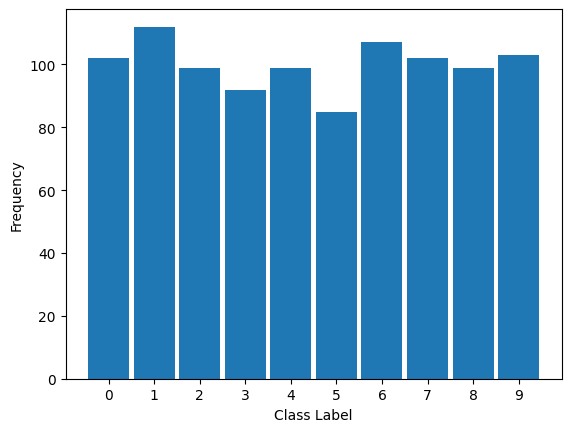

In [2]:
# making sure the quantity of examples for each label are about the same
plt.hist(train_y, bins=10, rwidth=0.9)
plt.xticks(0.9*np.arange(10)+0.45, range(10))
plt.ylabel("Frequency")
plt.xlabel("Class Label")
plt.show()

## Question 2.1 -- Preprocessing

The first thing we should do is preprocess the images so that they are ready to be input into our models. First, print out the shape of the dataset's inputs (`train_X`).

In [3]:
print("Shape of train_X:", train_X.shape)

Shape of train_X: (1000, 32, 32, 3)


**Q 2.1.1** What does each value in the tuple that was printed out mean?

The shape (1000, 32, 32, 3) indicates:

1000: The number of images in our training set.

32: The height of each image in pixels.

32: The width of each image in pixels.

3: The number of color channels (RGB).

**Q 2.1.2** Next, flatten the pixel values to a single vector. What is the length of this vector? Print out the shape of the flattened dataset's inputs once more.

In [3]:
# Your answer here
def flatten_cifar10(samples):
    return samples.reshape(samples.shape[0], -1)

# Flatten the train and test sets
train_X = flatten_cifar10(train_X)
test_X = flatten_cifar10(test_X)

# Print the new shape
print("New shape of train_X:", train_X.shape)
print("Each image is now a vector of length:", train_X.shape[1])

New shape of train_X: (1000, 3072)
Each image is now a vector of length: 3072


## Question 3 -- Model Selection using Grid Search

In the lecture, we have seen four different ML classification algorithms: logistic regression, decision trees, random forests and support vector machines. In this assignment, we will figure out which is best, and a basic method to figure out the best way to tune the parameters of each one. Remember, a hyperparameter is something that you choose by hand about the model or the way it trains.

### Question 3.1 -- Logistic regression

Use `sklearn` (as in the lecture notebook) to classify the CIFAR10 sub-dataset. There are not a lot of major hyperparameters to tune here, so this exercise should be straightforward. Create a LogisticRegression object, fit it on the training data, and compute the train and test accuracies.

*Expected runtime: ~1min*

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter=1000, multi_class='auto') # create the logistic regression object
modelLR = modelLR.fit(train_X, train_y) # fit on training data

print("Training score:", modelLR.score(train_X, train_y))
print("Testing score: ", modelLR.score(test_X, test_y))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training score: 1.0
Testing score:  0.249


**Q 3.1.2** Does the model work well in your opinion? What about whether it is over/underfitting?

The model has perfectly memorized the training data (100% training accuracy), yet only achieves about 25% accuracy on the test set. This huge gap indicates overfitting: the model fits the training set extremely well but does not generalize to unseen data. For a 10-class problem, 25% is only slightly above random guessing (10%), so in practice, it’s not performing well on the test set.

### Question 3.2 -- Decision Trees

Decision trees have one main hyperparameter that you can tune -- this is the maximum depth of the tree being trained. Thus, we'll try and figure out what depth is the optimal for our purposes.

An important thing to note is that decision trees are randomized initially -- this means that two trees of the same depth may have wildly different performances, depending on how they were initialized.

**Q 3.2.1** Loop over max tree depths from $d=1$ to $d=15$ and store the mean and standard deviation of train and test scores for 10 randomly initialised trees.

*Expected runtime: <5 mins*

In [5]:
from sklearn import tree

train_acc_mean, train_acc_std = [], [] # to store the training accuracies
test_acc_mean, test_acc_std = [], []   # to store the testing accuracies

# Loop over tree depths from d=1 to d=15
for d in tqdm(range(1, 16)):
    train_perfs = []  # store interim train scores
    test_perfs = []   # store interim test scores
    # For each depth, train 10 trees with different random initializations
    for _ in range(10):
        # Initialize new DecisionTreeClassifier
        modelDT = tree.DecisionTreeClassifier(max_depth=d, 
                                              random_state=np.random.randint(10000))
        
        # Train the model
        modelDT.fit(train_X, train_y)
        
        # Compute and store train and test scores
        train_perfs.append(modelDT.score(train_X, train_y))
        test_perfs.append(modelDT.score(test_X, test_y))

    # append mean and std scores to appropriate lists
    train_acc_mean.append(np.mean(train_perfs))
    train_acc_std.append(np.std(train_perfs))
    test_acc_mean.append(np.mean(test_perfs))
    test_acc_std.append(np.std(test_perfs))


100%|██████████| 15/15 [02:52<00:00, 11.49s/it]


**Q 3.2.2** Plot the test and train means with errorbars equal to one standard deviation (look at [plt.errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) for reference). Don't forget to add labels.

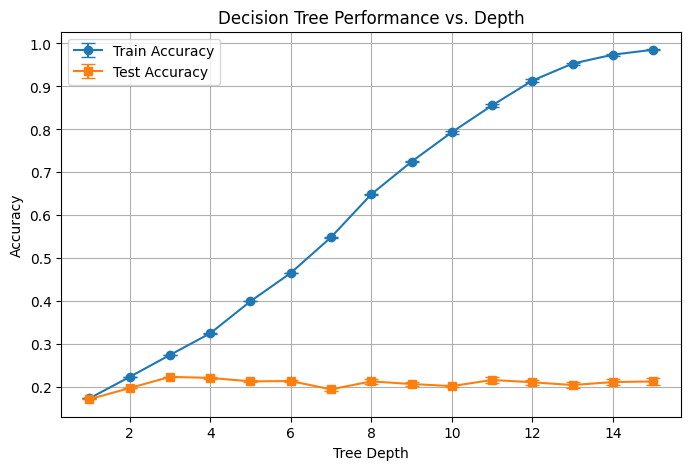

In [6]:
import matplotlib.pyplot as plt

depths = range(1, 16)  # d=1 to d=15
plt.figure(figsize=(8, 5))
plt.errorbar(depths, train_acc_mean, yerr=train_acc_std, 
             fmt='-o', capsize=5, label='Train Accuracy')
plt.errorbar(depths, test_acc_mean, yerr=test_acc_std, 
             fmt='-s', capsize=5, label='Test Accuracy')

plt.title("Decision Tree Performance vs. Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


**Q 3.2.3**

1. Is there a lot of variation of the performance of the trees (enough to question statistical significance)?
2. Which model (of the ones you tested) performed best on the training set? Which performed best on the test set?
3. At what depth do models start to overfit the training data?

1. Variation in Performance

From the error bars, we see relatively small standard deviations (the error bars are short), so there isn’t a huge spread in accuracy across different random initializations.
This means the results are fairly consistent across runs, and there’s no extreme variability that would make us question whether these accuracy differences are purely random noise.

2. 
Best on Training: As the depth increases, the model can fit the training data better. At the highest depth (around 14–15), the training accuracy essentially hits 1.0.

Best on Test: The test accuracy peaks at a much shallower depth—somewhere around depth 3 to 5, based on the slight upticks. Beyond that point, the training accuracy continues to climb, but test accuracy remains roughly the same or even dips slightly.

3. Overfitting Depth

Overfitting is evident when the training accuracy continues to increase, but test accuracy stops improving or begins to decline. Here, once the tree depth goes beyond about 4 or 5, the training accuracy soars toward 1.0, while test accuracy stays flat or marginally decreases. That’s the clear sign of overfitting.

## Question 3.3 -- Random Forests
Just like in the decision trees, one hyperparameter you can choose is the depth of the tree. However, another important one is the number of decision trees. In this case, the performance is affected by the combination of these hyperparameters, and so we need to train and evaluate them at each combination.

**Q 3.3.1** Loop over $n_{trees}=10$ to $n_{trees}=100$ in increments of 10, and max tree depths from $d\in[1,3,5,7,9,11,13,15]$ and store the mean and standard deviation of train and test scores for 5 randomly initialised trees.

*Expected runtime: ~9 minutes*

In [7]:
from sklearn.ensemble import RandomForestClassifier as RFC

train_acc_mean, train_acc_std = np.zeros((10, 8)), np.zeros((10, 8)) # storing it in an np array instead of a list makes it easier
test_acc_mean, test_acc_std = np.zeros((10, 8)), np.zeros((10, 8))

n_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
depths  = [1, 3, 5, 7, 9, 11, 13, 15]

for tree_idx, t in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs  = []
        
        # Train 5 random forests for each (t, d) pair
        for _ in range(5):
            # Initialize the model
            modelRF = RFC(n_estimators=t, max_depth=d,
                          random_state=np.random.randint(99999))
            
            # Fit on training data
            modelRF.fit(train_X, train_y)
            
            # Store interim values
            train_perfs.append(modelRF.score(train_X, train_y))
            test_perfs.append(modelRF.score(test_X, test_y))
        
        # Compute mean and std, store in the arrays
        train_acc_mean[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_std[tree_idx][d_idx]  = np.std(train_perfs)
        test_acc_mean[tree_idx][d_idx]  = np.mean(test_perfs)
        test_acc_std[tree_idx][d_idx]   = np.std(test_perfs)

100%|██████████| 10/10 [05:20<00:00, 32.04s/it]


Looping over several variables and testing each combination is called a **grid search**. Since we have two hyperparameters, we cannot plot a 1D line to see which is best, as we did for normal DTs. One way to visualize this instead is a heatmap. For this, we can `seaborn`'s [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.  

**Q 3.3.2** Plot two heatmaps: one for the train accuracies and one for the test ones.

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


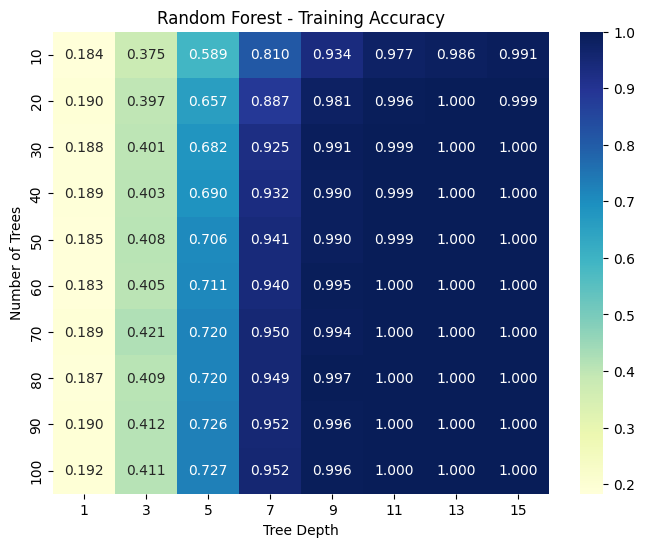

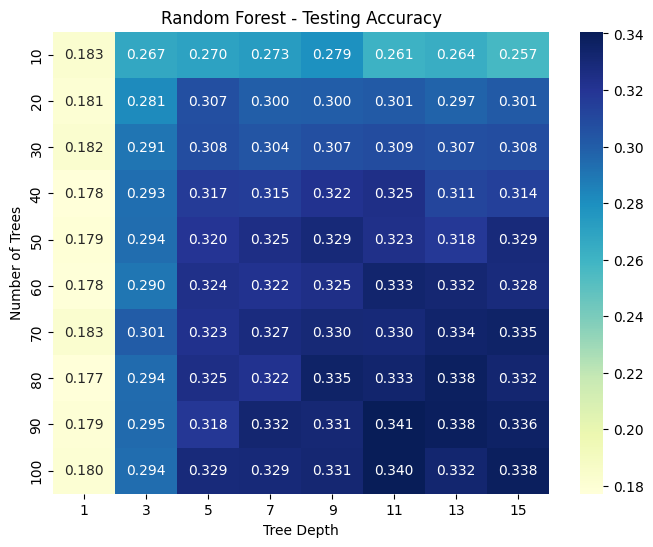

In [8]:
import seaborn as sns
# Figure 1
plt.figure(figsize=(8, 6))
sns.heatmap(train_acc_mean, annot=True, fmt=".3f", cmap="YlGnBu",
            xticklabels=depths, yticklabels=n_trees)
plt.title("Random Forest - Training Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Number of Trees")
plt.show()

# Figure 2
plt.figure(figsize=(8, 6))
sns.heatmap(test_acc_mean, annot=True, fmt=".3f", cmap="YlGnBu",
            xticklabels=depths, yticklabels=n_trees)
plt.title("Random Forest - Testing Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Number of Trees")
plt.show()

**Q 3.3.2**
1. What trends with respect to each hyperparameter do the heatmaps show you?
2. What model performs best on the train set? What model performs best on the test set?
3. What model would you choose to deploy and why?

1. Trends in the Heatmaps

Number of Trees: Increasing 𝑛 (going down the rows) tends to raise the training accuracy. On the test set, more trees generally help a bit, but the improvement is modest.

Tree Depth: Increasing the depth (moving right along the columns) dramatically boosts training accuracy—especially past depth ~7, where the model often hits near 100% on the train set. On the test set, however, deeper trees don’t yield huge improvements. Performance increases slightly from depth=1 to about depth=7, then levels off or even slightly drops.

2. Best Model for Train vs. Test

Train Set: The combination of high depth (13–15) and high number of trees (≥ 70) consistently gives ~100% training accuracy. That’s the best we can get on the train set.

Test Set: The best test accuracy is around 0.33–0.35 in the bottom-right region (larger depth and more trees). While the improvement is not huge, models with, n=100 and depth=13 or 15 appear to achieve the highest test accuracy.

3. Which Model to Deploy and Why

If we only care about raw test accuracy, we might choose the largest forest (e.g., 100 trees) with a moderate-to-high depth (like 7–15) to maximize performance.
If we find the gains in test accuracy are small compared to simpler models (like 50 trees at depth=7), we might prefer a less complex (faster) model that still yields a similar test score.

In short, we’d typically pick the model that maximizes test accuracy (or meets some performance threshold) while balancing training time and model complexity.

## Question 3.4 -- Support Vector Machines

`sklearn`'s SVM classifier implementation (called "SVC", we already met them in the lecture) contains quite a number of hyperparameters you can tune. The ones we are looking at today are the kernel, the parameter `C` (which is some penalty term for incorrectly classifying a data point, applicable to the RBF kernel), `gamma`, which is a measure of how important closer points to the decision boundary are with respect to the decision boundary (applicable to the RBF kernel), and `degree`, which is the degree of the polynomial function (applicable to the poly kernel). Let $C\in\{0.1, 1, 10, 100\}$ and $gamma\in\{10^x|-2\leq x\leq 2, x\in\mathbb{Z}\}$. Let us use $degree\in\{2,3,4\}$.

A note about the kernel: In short, this is a function that determines what the shape of the decision boundary are. The choices that we can check out here (there are more) are `linear` (linear decision boundary), `poly` (polynomial) and `rbf` (radial basis function) in order of flexibility.

Since we are trying to optimize for a number of different parameters, writing out all the code ourselves gets a bit messy. Instead, we use `sklearn` again! The class in question is called `GridSearchCV`, which performs a grid search over parameters with specified values.

The 'CV' part of the name refers to the fact that we are performing *cross-validation*, which is related to the concept of validation sets that we encountered last week. We will cover it in a future lecture, but for now, the way it works is that it splits the training set into $k$ sets (called 'folds') and iteratively trains on $k-1$ folds and validates on the remaining one. The result is the mean over $k$ iterations. CV is considered the 'gold standard' with respect to analysing model robustness. We will use $k=5$ (appropriately called *5-fold cross-validation*), which is standard for a first analysis.

**Q 3.4.1** Run a gridsearch with 5-fold cross-validation over the hyperparameters discussed above to find an optimal SVC model. Please look at GridSearchCV's documentation for more information.

*Expected runtime: Around 15 minutes if you're lucky.*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100],
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10, 100],
        'degree': [2, 3, 4],
        'gamma': [0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1, 10, 100]
    }
]

# Create the GridSearchCV object
optimal_params_svm = GridSearchCV(
    estimator=SVC(),          # The SVC model
    param_grid=param_grid_svm, 
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Optimize for accuracy
)

# Fit the model on the training data
optimal_params_svm.fit(train_X, train_y)

# Print the best parameters and the best cross-validation score
print(
    "The best parameters are %s with a score of %0.2f"
    % (optimal_params_svm.best_params_, optimal_params_svm.best_score_)
)

**Q 3.4.2**
1. How many combinations of parameters are there? Why?
2. Using 5-fold validation, how many models do you train in total?

*Your answer here*

**Q 3.4.3**
Create a model `modelSVC` with the optimal parameters you found above and print out the train and test accuracies.

In [ ]:
modelSVC = SVC(...) # create model
modelSVC = ...      # train model
print("Training score:", ...)
print("Testing score: ", ...)

## Question 4 -- Training and inference speed
Depending on the application, the choice of model may be affected by more than just the raw score. One of these factors is *time* -- specifically, how long does the model take to train, and how long does it take to make a prediction. In this case we're increasing the number of training points to 5000.
When analyzing the training and inference speed of machine learning models, it is crucial to measure how long a model takes to:

1. Train (Fit): The time required to learn from the training dataset.
2. Infer (Predict): The time required to classify a new image (for image classification) or make a prediction on new data.

The perf_counter() function is useful for this because it provides high-precision timing measurements, making it ideal for benchmarking models.

**Q 4.1** Create models with the  that you found above, measure how long it takes for it to train and classify images from the test and train set, along with their accuracies (a classification, or a single run of a model, is generally called an 'inference'). We generally store time with an action taken (fit or inference) *per image* and the inference times *per image*.

*Runtime: ~3mins*



In [ ]:
from time import perf_counter # used to compute intervals

n_train, n_test = ..., ...
... = get_data_subset(...) # get data
... # flatten images

# set up lists to store scores and times
train_scores = []
test_scores = []
fit_times = []
inf_times = []

def train_and_eval(model, train_X, train_y, test_X, test_y):
    """ Trains, times and evaluates a given instantiated model on data """

    start = perf_counter()               # check current (start) time
    model = model.fit(...)               # perform some code that you want to time
    end = perf_counter()                 # check current (end) time
    fit_time = end-start                 # compute interval

    # time inference over train score
    start = perf_counter()
    train_score = ...
    end = perf_counter()
    train_score_time = end-start

    # time inference over test score
    start = perf_counter()
    test_score = ...
    end = perf_counter()
    test_score_time = end-start

    return train_score, test_score, fit_time, train_score_time, test_score_time

# create models
modelLR = ...
modelDT = ...
modelRFC = ...
modelSVC = ...

for model in tqdm([modelLR, modelDT, modelRFC, modelSVC]):
    train_score, test_score, fit_time, train_score_time, test_score_time = train_and_eval(model, train_X, train_y, test_X, test_y)
    # add these values to the list set up above
    # don't forget that the training and inference times should be stored per image and not for the whole run
    ...

Plot two barplots:
1. **Q 4.2** On one, plot a dual barplot showing the test and train accuracies.
2. **Q 4.3** On the other, plot a double barplot showing the training time *per image* and the inference times *per image* (so divide the total time by the number of images).

For each, make sure you don't forget the unit of measurement, add a title and axis labels and make sure there are labels and a legend.

In [ ]:
model_names = [...]
bar_width = 0.35

# Create an array for the x-axis positions
x = np.arange(...)

# Plotting the bars
fig, ax = plt.subplots()
bar1 = ax.bar(...) # training accuracy: don't forget to add labels
bar2 = ax.bar(...) # testing accuracy

# Add labels, title, and legend
ax.set_xlabel(...)
ax.set_ylabel(...)
ax.set_title(...)
# set proper x ticks: I'll help you with this one
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

In [ ]:
# Plotting the times
fig, ax = plt.subplots()
bar1 = ax.bar(...) # fit times: don't forget labels
bar2 = ax.bar(...) # inference times

# Add labels, title, and legend
# set proper x ticks

**Q 4.4**
1. What model is the fastest to train?
2. What model is fastest to infer?
3. What model has the highest train accuracies? What model has the highest test accuracies?
4. What model would you choose to use? Why?

*Your answer here*